# <center> IRIS DATASET CLASSIFICATION </center>

## In this we will be classifying the IRIS dataset into 3 different categories on the basis of different parameters
<h3> Parameters:- </h3>
<h4> SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm</h4>

<h3> Target:- </h3>
<h4> Species of the flower </h4>

### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('Iris.csv')
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Lets see the structure (rows and columns) of the dataset

In [3]:
print("Number of rows and columns in the dataset:- ")
print()
print('Rows: ',raw_data.shape[0])
print('Columns: ',raw_data.shape[1])
print()
print("Features or input ")
print()
print(raw_data.columns.to_list())
print()
print("Unique values ")
print()
print(raw_data.nunique())

Number of rows and columns in the dataset:- 

Rows:  150
Columns:  6

Features or input 

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Unique values 

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64


In [4]:
raw_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Checking if there is any null value in the dataset

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### From the above output it is clear that there is no NULL Value in the dataset

In [6]:
df_setosa = raw_data.loc[raw_data['Species']=='setosa']
df_virginica = raw_data.loc[raw_data['Species'] == 'virginica']
df_versicolor = raw_data.loc[raw_data['Species'] == 'versicolor']

### Exploratory Data Analysis

(<AxesSubplot:xlabel='Species', ylabel='Count'>,
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

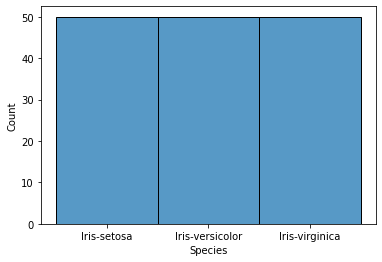

In [7]:
sns.histplot(x='Species',data=raw_data),raw_data['Species'].value_counts()

### Bi-variate Analysis

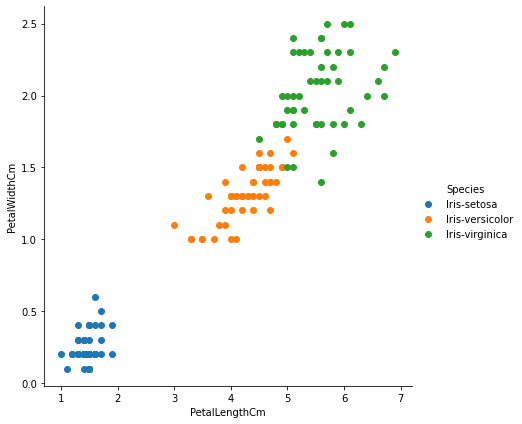

In [8]:
sns.FacetGrid(hue='Species',data=raw_data, size=6).map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
plt.show()

#### Having a look at Individual Feature in SeaBorn through BoxPlot

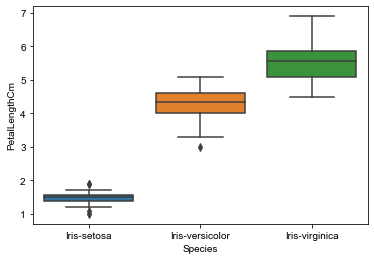

In [9]:
sns.boxplot(x='Species', y='PetalLengthCm', data=raw_data)
sns.set(rc = {'figure.figsize':(25,10)})

#### Multivariate Analysis

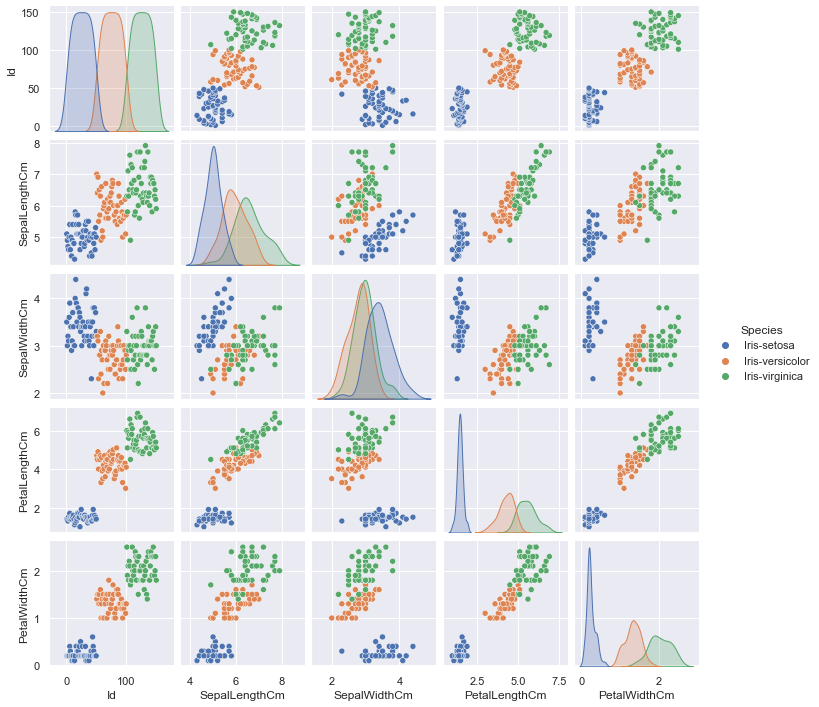

In [10]:
sns.pairplot(hue='Species',data=raw_data, size=2)

In [11]:
df = raw_data.drop(['Id'],axis=1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Model Creation

#### Before building the model, convert the target variable i.e. Species to numerical form. 

In [12]:
df_dummy = df.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dummy['Species'] = le.fit_transform(df_dummy['Species'])
df_dummy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df_dummy = df_dummy.sample(frac=1)
df_dummy

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
57,4.9,2.4,3.3,1.0,1
124,6.7,3.3,5.7,2.1,2
146,6.3,2.5,5.0,1.9,2
53,5.5,2.3,4.0,1.3,1
144,6.7,3.3,5.7,2.5,2
...,...,...,...,...,...
121,5.6,2.8,4.9,2.0,2
0,5.1,3.5,1.4,0.2,0
132,6.4,2.8,5.6,2.2,2
14,5.8,4.0,1.2,0.2,0


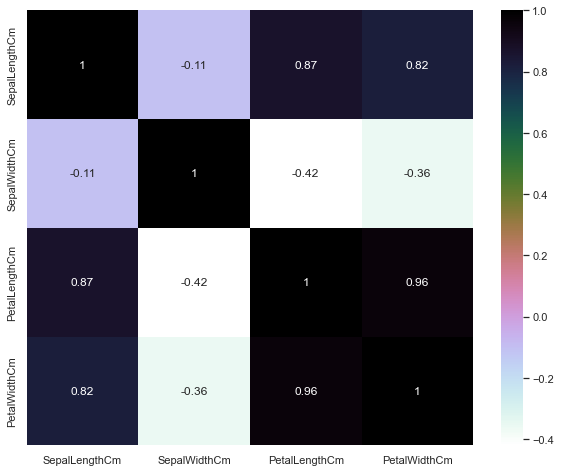

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [16]:
X = df_dummy.drop(['Species'],axis=1)
y = df_dummy['Species']
(X.shape,y.shape)

((150, 4), (150,))

#### Getting the training and testing data

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

### Model Training
#### For model training we will be using different models like:- 
#### Logistic Regression, Naive Bayes, Random Forest Classifier, ANN, KNN, Support Vector Classifier

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [19]:
# for Support Vector Classifier
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=2)
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:
model = SVC(C=1,gamma='scale',kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [21]:
import joblib
filename = 'file.sav'
joblib.dump(model,filename)


['file.sav']

In [22]:
filename = 'file.sav'
loaded_model = joblib.load(filename)
result = loaded_model.predict(X_test)

print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

